# <center> <img src="../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Big Data** </center>
---
### <center> **Autumn 2025** </center>
---
### <center> **Examples on MapReduce with Apache Spark** </center>
---
**Profesor**: Pablo Camarillo Ramirez

# Find the PySpark Installation

In [18]:
import findspark
findspark.init()

# Create SparkSession

In [19]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on Map Reduce") \
    .master("spark://9b6037c67714:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

# Exercise: Temperature Conversion
## Create the RDD

In [20]:
def c_to_f(c):
    return c * (9.0/5.0) + 32.0

## Map Phase

In [21]:
rdd_map = rdd_input.map(lambda x: (x, 1))
rdd_map.collect()

[('Lorem', 1), ('ipsum', 1), ('dolor', 1), ('Lorem', 1)]

## Shuffle and Reduce Phases

In [22]:
rdd_reduced = rdd_map.reduceByKey(lambda a,b: a + b)
rdd_reduced.collect()

[('Lorem', 2), ('ipsum', 1), ('dolor', 1)]

## Collect results

# ReducedByKey

In [28]:
data = [
('apple', 1),
('banana', 2),
('apple', 3),
('orange', 4),
('banana', 1),
('orange', 2)
]
rdd_fruits = sc.parallelize(data)
reduced_rdd = rdd_fruits.reduceByKey(lambda a, b: a + b)
reduced_rdd.collect()

[('banana', 3), ('orange', 6), ('apple', 4)]

In [27]:
words = ["apple", "banana", "apple", "orange",
"banana", "apple", "orange", "orange"]
words_rdd = sc.parallelize(words)
word_counts = words_rdd.countByValue()
word_counts

defaultdict(int, {'apple': 3, 'banana': 2, 'orange': 3})

In [26]:
data = [
('fruit', 'apple'),
('fruit', 'banana'),
('vegetable', 'carrot'),
('fruit', 'orange'),
('vegetable', 'broccoli')
]
rdd = sc.parallelize(data)
grouped_rdd = rdd.groupByKey()
grouped_rdd.collect()

[('vegetable', <pyspark.resultiterable.ResultIterable at 0xffffa028e9b0>),
 ('fruit', <pyspark.resultiterable.ResultIterable at 0xffff88f5e3b0>)]

# Example: Log Analysis
## Create RDD

In [29]:
lines = sc.textFile("/opt/spark/work-dir/data/web_access.log")

In [30]:
lines.collect()

['u001,https://shop.example.com/,2025-09-07T12:03:14Z',
 'u002,https://shop.example.com/product/42,2025-09-07T12:04:10Z',
 'u001,https://shop.example.com/product/42,2025-09-08T12:07:55Z']

## Transform every line in a tuple

In [31]:
from pcamarillor.spark_utils import parse_line
records = lines.map(parse_line)
records.collect()

[('u001', 'https://shop.example.com/', '2025-09-07T12:03:14Z'),
 ('u002', 'https://shop.example.com/product/42', '2025-09-07T12:04:10Z'),
 ('u001', 'https://shop.example.com/product/42', '2025-09-08T12:07:55Z')]

## Filter data from yesterday

In [32]:
from datetime import datetime, timezone, timedelta
from pcamarillor.spark_utils import is_yesterday, to_domain
yesterday = (datetime.now(timezone.utc).date() - timedelta(days=1)).isoformat()
yesterday

'2025-09-08'

In [33]:
y_records = records.filter(lambda record: is_yesterday(record[2], yesterday))
y_records.collect()

[('u001', 'https://shop.example.com/product/42', '2025-09-08T12:07:55Z')]

## Reduce by domain, user

In [34]:
domain_user_ones = y_records.map(lambda record: ((to_domain(record[1]), record[0]), 1))
unique_domain_user = domain_user_ones.reduceByKey(lambda a, b: 1)
unique_domain_user.collect()

[(('shop.example.com', 'u001'), 1)]

## Count unique users per domain

In [35]:
domain_ones = unique_domain_user.map(lambda kv: (kv[0][0], 1))
unique_visitors_per_domain = domain_ones.reduceByKey(lambda a, b: a + b)
unique_visitors_per_domain.collect()

[('shop.example.com', 1)]

# Get results

In [36]:
result = unique_visitors_per_domain.collect()
result

[('shop.example.com', 1)]

# Close SparkContext

In [15]:
sc.stop()

In [16]:
!pwd

/opt/spark/work-dir/examples


In [17]:
import random
students = [
 'Juan Carlos', 'Caro', 'Luis Bravo',
 'Jose Alfredo', 'Roberto', 'Carlos Eduardo',
 'Jaime Contreras', 'Jose Juan', 'Axel Escoto',
 'Axel Leonardo', 'Jaime Galindo', 'Axel Gallardo', 'Melina', 'Antonia',
 'Santiago', 'Valeria', 'Diego', 'Bernard',
 'Luis Pelayo', 'Pablo', 'Luis Regalado',
 'Santana', 'Sebastian', 'Sergio'
]
problems = ["Temperatures from Celsius to Fahrenheit", " Extract Timestamps", "Counting words"]
assignments = {student: random.choice(problems) for student in students}
for s, p in assignments.items():
    print(f"{s} -> {p}")

Juan Carlos -> Temperatures from Celsius to Fahrenheit
Caro -> Counting words
Luis Bravo -> Temperatures from Celsius to Fahrenheit
Jose Alfredo -> Counting words
Roberto -> Counting words
Carlos Eduardo -> Temperatures from Celsius to Fahrenheit
Jaime Contreras ->  Extract Timestamps
Jose Juan -> Temperatures from Celsius to Fahrenheit
Axel Escoto ->  Extract Timestamps
Axel Leonardo ->  Extract Timestamps
Jaime Galindo -> Counting words
Axel Gallardo -> Counting words
Melina ->  Extract Timestamps
Antonia -> Temperatures from Celsius to Fahrenheit
Santiago -> Counting words
Valeria -> Counting words
Diego -> Temperatures from Celsius to Fahrenheit
Bernard -> Temperatures from Celsius to Fahrenheit
Luis Pelayo -> Counting words
Pablo -> Temperatures from Celsius to Fahrenheit
Luis Regalado -> Temperatures from Celsius to Fahrenheit
Santana ->  Extract Timestamps
Sebastian -> Counting words
Sergio ->  Extract Timestamps


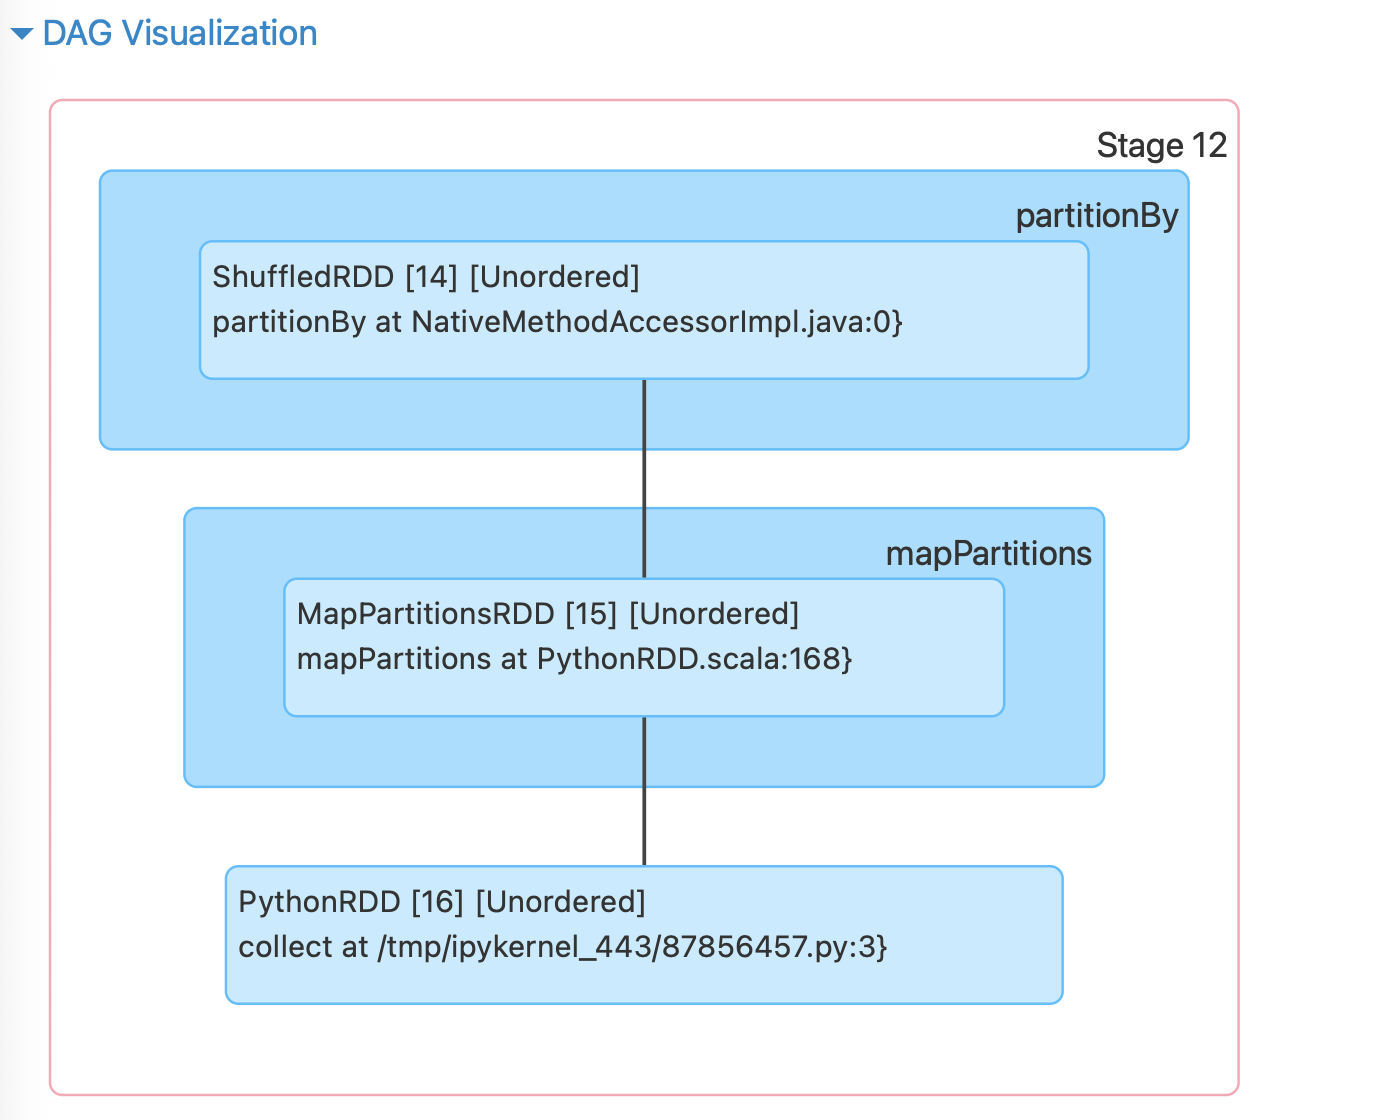